In [1]:
using Plots; pyplot()
include("../julia/aguirregabiria_core.jl")

compute_fixed_point (generic function with 1 method)

In [2]:
#=
length_of_price_grid = 10
min_price, max_price = 0.5, 1.5
n_of_lambdas_per_dim = 3
max_iters            = 3
error_tol            = 1e-5
=#

length_of_price_grid = 20
min_price, max_price = 0.5, 1.5
n_of_lambdas_per_dim = 5
error_tol            = 1e-5

1.0e-5

In [3]:
price_grid = linspace(min_price, max_price, length_of_price_grid)

0.5:0.05263157894736842:1.5

In [4]:
simplex3d = generate_simplex_3dims(n_of_lambdas_per_dim)

15×3 Array{Float64,2}:
 0.0   0.0   1.0 
 0.0   0.25  0.75
 0.0   0.5   0.5 
 0.0   0.75  0.25
 0.0   1.0   0.0 
 0.25  0.0   0.75
 0.25  0.25  0.5 
 0.25  0.5   0.25
 0.25  0.75  0.0 
 0.5   0.0   0.5 
 0.5   0.25  0.25
 0.5   0.5   0.0 
 0.75  0.0   0.25
 0.75  0.25  0.0 
 1.0   0.0   0.0 

## Testing interpolation:

In [5]:
V0 = [2; ones(size(simplex3d,1)-1)]
#tmp_interpV = interpV(simplex3d, simplex3d[:,1])
tmp_interpV = interpV(simplex3d, V0)
methods(tmp_interpV)

# 1 method for generic function "(::interpolate_V)":
(::#interpolate_V#7)(x) in Main at C:\Users\gballari\Documents\GitHub\LearningModels\julia\aguirregabiria_core.jl:40

In [6]:
tmp_V = zeros(size(simplex3d,1))
for i in 1:size(simplex3d,1)
    tmp_V[i] = tmp_interpV(simplex3d[i,:])
end
hcat(V0, tmp_V)

15×2 Array{Float64,2}:
 2.0  2.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [7]:
tmp_V = zeros(11,11)
for (i1, x1) in enumerate(0.0:0.1:1.0)
    for (i2, x2) in enumerate(0.0:0.1:1.0)
        tmp_V[i1,i2] = tmp_interpV([x1, x2])
    end
end
tmp_V

11×11 Array{Float64,2}:
 2.0  1.6  1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.6  1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6
 1.2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.6  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## Test `period_return()` :

In [8]:
include("../julia/aguirregabiria_core.jl")
# lambdas is always a vector of size n_of_lambdas_per_dim
test_lambdas = [0.2, 0.7, 0.1]

3-element Array{Float64,1}:
 0.2
 0.7
 0.1

In [9]:
constant_part = (price_grid - c) * exp(alpha + (sigma_eps^2)/2)

0.0:0.16211667625884374:3.080216848918031

In [10]:
summation = exp.(log.(price_grid)*betas_transition' * test_lambdas)
constant_part .* summation

20-element Array{Float64,1}:
 0.0     
 0.566615
 0.935309
 1.17663 
 1.33369 
 1.43378 
 1.49468 
 1.52829 
 1.54269 
 1.5435  
 1.5347  
 1.51911 
 1.49877 
 1.47515 
 1.44935 
 1.42216 
 1.39418 
 1.36583 
 1.33745 
 1.30927 

In [11]:
period_return([0.9, 1], test_lambdas)

2-element Array{Float64,1}:
 1.54703
 1.54011

## Test `dmd_transition_fs()`, `belief()`, `update_lambdas()` :

In [12]:
include("../julia/aguirregabiria_core.jl")
dmd_transition_fs(1, 1.2, 1)

3-element Array{Float64,1}:
 0.275406
 0.658411
 0.725042

In [13]:
belief(1, 1.2, 1, test_lambdas)

0.5884734620669838

Testing "new_belief" to be a Gaussian mixture:

In [14]:
new_lambdas(x) = update_lambdas(x, price_grid[i], ~, lambda_weights)
new_belief(x)  = belief(x, price_grid[i], ~, lambda_weights)

rescaled_demand = log.(linspace(0.01, 10, 50))
new_belief_vals = zeros(size(rescaled_demand))

#for dmd, i in enumerate(rescaled_demand)
#    new_belief_vals[i] = new_beliefxaxis!

LoadError: [91msyntax: invalid iteration specification[39m

In [15]:
update_lambdas(0.3, 2, 1, test_lambdas)

3-element Array{Float64,1}:
 6.88419e-5
 0.820924  
 0.179007  

## Build `V0` :

In [16]:
optimal_price = myopic_price(test_lambdas)

0.9504504504504505

In [17]:
function V_0(x) 
    optimal_price = myopic_price(x)
    return period_return(optimal_price, x)
end

V_0 (generic function with 1 method)

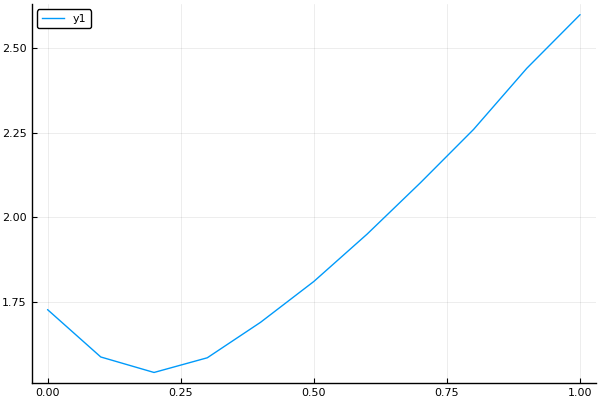

In [18]:
lambdas_selected = [[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]]

V_0_values = V_0.(lambdas_selected)
plot(0:0.1:1, V_0_values)

## Test `E0fV(Vguess, price_grid, lambda_weights)` :

In [19]:
new_lambdas(x) = update_lambdas(x, price_grid[1], ~, test_lambdas)
new_belief(x)  = belief(x, price_grid[1], ~, test_lambdas)
integrand(x) = V_0(new_lambdas(x)) * new_belief(x)

integrand (generic function with 1 method)

In [20]:
V_0(test_lambdas)

1.5464000419924135

In [21]:
logd_min, logd_max = -6, 2.3
integrand(1)

0.09156848098729656

In [22]:
A = quadgk(integrand, logd_min, logd_max, maxevals=250)[1]

0.8078026050330478

In [23]:
include("../julia/aguirregabiria_core.jl")
@time A = E0fV(V_0, price_grid, test_lambdas)

  1.191906 seconds (814.10 k allocations: 30.708 MiB, 3.15% gc time)


20-element Array{Float64,1}:
 1.76605
 1.74884
 1.72383
 1.69476
 1.66331
 1.63141
 1.60134
 1.5757 
 1.55711
 1.54757
 1.54751
 1.5556 
 1.56946
 1.58666
 1.60529
 1.62409
 1.64227
 1.65938
 1.67519
 1.68963

## Test `bellman_operator(Vguess, price_grid, lambda_simplex)` :

In [24]:
include("../julia/aguirregabiria_core.jl")
@time T_V, policy = bellman_operator(V_0, price_grid, simplex3d)

  4.538262 seconds (8.84 M allocations: 294.722 MiB, 3.43% gc time)


(interpolate_V, [1.5, 1.5, 1.5, 1.39474, 1.23684, 1.5, 1.5, 0.763158, 0.763158, 0.657895, 0.710526, 0.710526, 0.657895, 0.657895, 0.657895])

In [25]:
T_V([0.4, 0.2, 0.4])

3.4078876232508746

In [26]:
for i in 1:size(simplex3d, 1)
    println(T_V(simplex3d[i,:]))
end

3.7479917798732343
3.487644925930526
3.276830452365081
3.1097365433689657
3.004802622140219
3.359802245092598
3.150488471171249
3.0329181709522786
3.0526591164574697
3.600875552944828
3.568792810483524
3.5908808834606507
4.2216838158307315
4.22405848873173
4.935147034793205


## Compute fixed point:

In [27]:
include("../julia/aguirregabiria_core.jl")
@time V, policy, error = compute_fixed_point(V_0, price_grid, simplex3d)

Computed iterate 10 with error 10.5471
 !-- elapsed time: 5.880044871 seconds
Computed iterate 20 with error 3.6784
 !-- elapsed time: 5.648885074 seconds
Computed iterate 30 with error 1.2827
 !-- elapsed time: 5.452727134 seconds
Computed iterate 40 with error 0.4473
 !-- elapsed time: 5.56715233 seconds
Computed iterate 50 with error 0.1559
 !-- elapsed time: 5.820444285 seconds
288.150644 seconds (994.05 M allocations: 48.317 GiB, 7.28% gc time)


(interpolate_V, [1.5, 1.5, 1.5, 1.44737, 1.23684, 1.5, 1.5, 0.710526, 0.710526, 0.657895, 0.657895, 0.657895, 0.657895, 0.657895, 0.657895], 0.1559476179903072)

In [28]:
policy

15-element Array{Float64,1}:
 1.5     
 1.5     
 1.5     
 1.44737 
 1.23684 
 1.5     
 1.5     
 0.710526
 0.710526
 0.657895
 0.657895
 0.657895
 0.657895
 0.657895
 0.657895

## Plotting of results

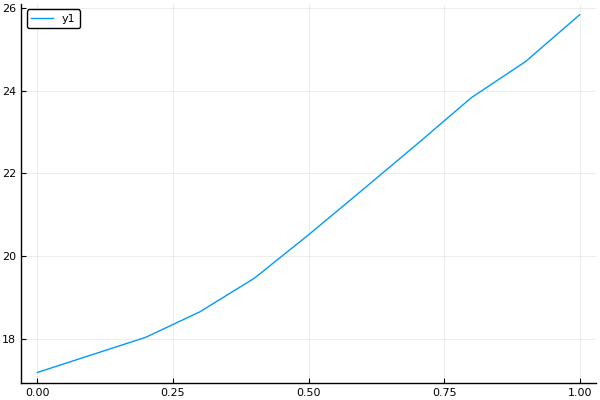

In [32]:
lambdas_selected = [[0.0, 0.5, 0.5],
                    [0.1, 0.5, 0.4],
                    [0.2, 0.5, 0.3],
                    [0.3, 0.5, 0.2],
                    [0.4, 0.5, 0.1],
                    [0.5, 0.4, 0.1],
                    [0.6, 0.3, 0.1],
                    [0.7, 0.2, 0.1],
                    [0.8, 0.1, 0.1],
                    [0.9, 0.1, 0.0],
                    [1.0, 0.0, 0.0]]

valuef_values = V.(lambdas_selected)
plot(0:0.1:1, valuef_values)

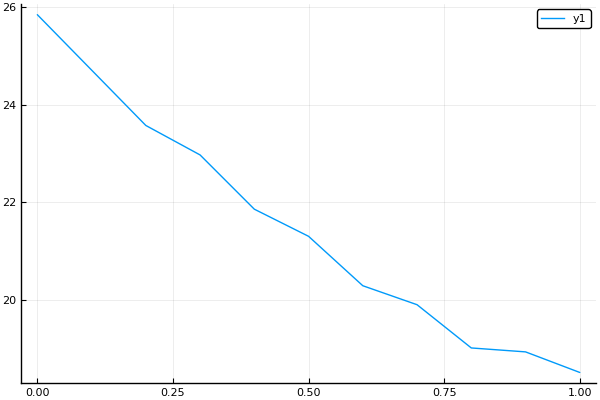

In [33]:
lambdas_selected = [[1.0, 0., 0.],
                    [0.9, 0.1, 0.],
                    [0.8, 0.2, 0.],
                    [0.7, 0.1, 0.1],
                    [0.6, 0.2, 0.2],
                    [0.5, 0.1, 0.4],
                    [0.4, 0.2, 0.4],
                    [0.3, 0.1, 0.6],
                    [0.2, 0.2, 0.6],
                    [0.1, 0.1, 0.8],
                    [0., 0.1, 0.9]]

valuef_values = V.(lambdas_selected)
plot(0:0.1:1, valuef_values)

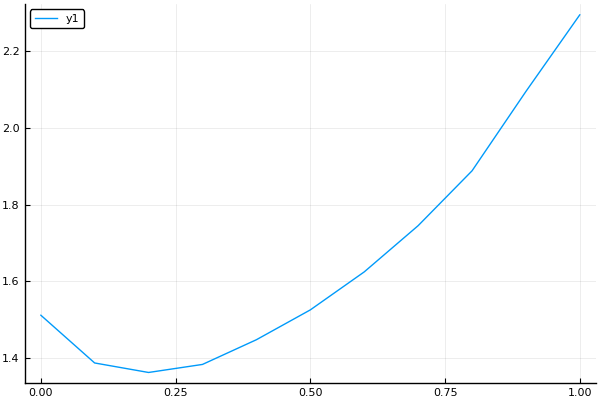

In [31]:
# -- original code --
#
# def optimized_period_profit(lambdas):
#     opt_p = myopic_price(lambdas)
#     E_β = src.exp_b_from_lambdas(lambdas, const.betas_transition)
#     logq = const.α + E_β*np.log(opt_p)
#
#     return (opt_p-const.c)*np.e**logq

function optimized_period_profit(lambdas)
    opt_p = myopic_price(lambdas)
    E_beta = dot(lambdas, betas_transition)
    logq  = alpha + E_beta*log(opt_p)
    
    return (opt_p-c)*exp(logq)
end

lambdas_selected_3d = [[0.0, 0.5, 0.5],
                        [0.1, 0.5, 0.4],
                        [0.2, 0.5, 0.2],
                        [0.3, 0.5, 0.2],
                        [0.4, 0.5, 0.1],
                        [0.5, 0.4, 0.1],
                        [0.6, 0.3, 0.1],
                        [0.7, 0.2, 0.1],
                        [0.8, 0.1, 0.1],
                        [0.9, 0.1, 0.0],
                        [1.0, 0.0, 0.0]]

profit_values = optimized_period_profit.(lambdas_selected_3d)
plot(0:0.1:1, profit_values)